In [2]:
import pandas as pd
# Loading the dataset
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Data Cleaning and Preprocessing

In [3]:
# Handling missing values
print(df.isnull().sum())

# Filling or removing missing values
df_cleaned = df.dropna()

# Feature selection (dropping 'day', 'month', 'year' as they might not be relevant for modeling)
df_selected = df_cleaned.drop(columns=['day', 'month', 'year'])


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


Data Visualization and Observations

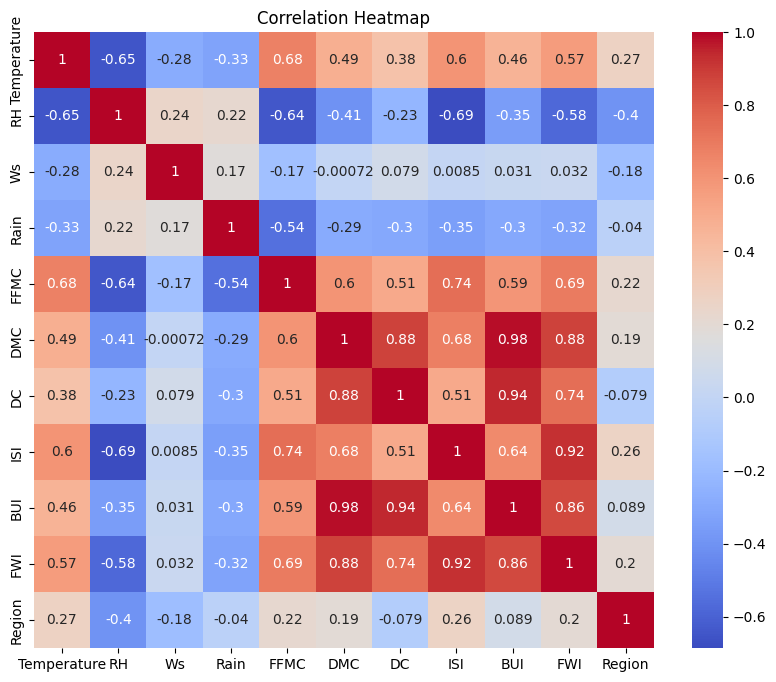

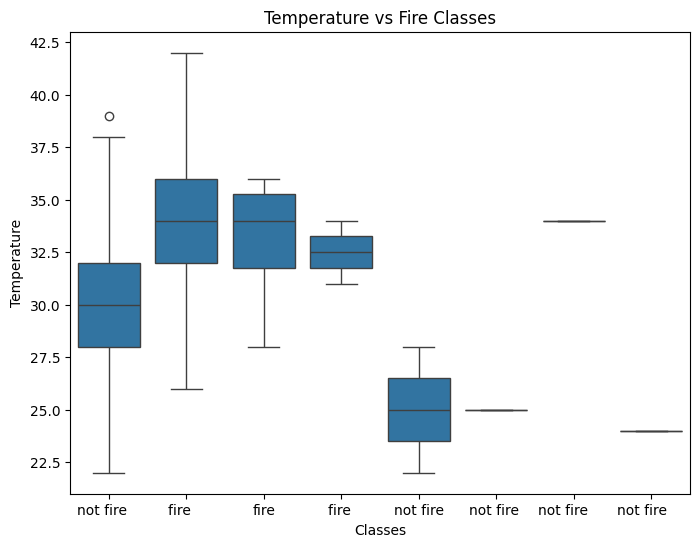

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns for correlation
numeric_df = df_selected.select_dtypes(include='number')

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Example: Visualizing the relationship between temperature and fire classes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Classes', y='Temperature', data=df_selected)
plt.title('Temperature vs Fire Classes')
plt.show()


Model Development and Analysis

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Defining feature variables (X) and target variable (y)
X = df_selected.drop(columns=['Classes'])  # Assuming 'Classes' is the target
y = df_selected['Classes'].apply(lambda x: 1 if x == 'fire' else 0)  # Convert to binary

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)  # Fiting on training data
y_pred_lr = lr.predict(X_test)  # Predicting on test data
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)
y_pred_poly = poly_lr.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Printing the MSE for all models
print(f"Linear Regression MSE: {mse_lr}")
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Ridge Regression MSE: {mse_ridge}")


Linear Regression MSE: 0.030541057680002877
Polynomial Regression MSE: 0.04776442906384302
Lasso Regression MSE: 0.02017089318283656
Ridge Regression MSE: 0.029965762829880862


 Model Evaluation and Testing

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluating models (for classification, convert predictions to binary)
y_pred_binary_lr = [1 if p > 0.5 else 0 for p in y_pred_lr]
accuracy_lr = accuracy_score(y_test, y_pred_binary_lr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_binary_lr)

print(f"Accuracy (Linear Regression): {accuracy_lr}")
print("Confusion Matrix (Linear Regression):\n", conf_matrix_lr)

Accuracy (Linear Regression): 0.9795918367346939
Confusion Matrix (Linear Regression):
 [[48  0]
 [ 1  0]]
